In [4]:
import sys
sys.path.append("../")
from config import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
data_scores = pd.read_csv(f"{DATA_DIR}/annotated/140_humanannotation_withoutunannotated.csv", index_col=False)
del data_scores['Unnamed: 0']
display(data_scores)
scores = { k: 0 for k in data_scores.columns }
for _, row in data_scores.iterrows():
    scores[data_scores.columns[np.argmax(row)]] += 1
scores

,human_title,bart_base,bart_cnn,bart_xsum,t5_small,gpt2,pegasus_xsum
0,0.200000,0.000000,0.000000,1.000000,-0.800000,-0.800000,0.400000
1,0.200000,0.000000,0.000000,-0.200000,0.000000,-0.400000,0.400000
2,0.200000,0.400000,-0.600000,0.600000,-0.200000,0.000000,-0.400000
3,0.600000,-0.800000,-0.600000,0.000000,0.800000,-0.200000,0.200000
4,0.000000,0.000000,-0.200000,0.000000,0.600000,0.000000,-0.400000
...,...,...,...,...,...,...,...
135,1.000000,0.000000,-0.333333,0.333333,0.000000,-0.333333,-0.666667
136,0.333333,1.000000,-1.000000,0.000000,0.666667,0.000000,-1.000000
137,1.000000,0.333333,-1.000000,0.000000,0.333333,-0.666667,0.000000
138,0.333333,0.666667,-0.333333,0.000000,0.000000,-0.666667,0.000000


{'human_title': 49,
 'bart_base': 23,
 'bart_cnn': 5,
 'bart_xsum': 28,
 't5_small': 11,
 'gpt2': 6,
 'pegasus_xsum': 18}

([<matplotlib.patches.Wedge at 0x19d4cc56e90>,
 [Text(0.4993895680663529, 0.9801071672559597, 'Human Title: 35%'),
  Text(-1.0015252915893476, 0.4549143768962163, 'Bart-Base: 16%'),
  Text(-1.07764293833934, -0.22064835700125615, 'Bart-CNN: 4%'),
  Text(-0.64656376502369, -0.8899187028927928, 'Bart-XSum: 20%'),
  Text(0.2687744809920624, -1.0666584637865335, 'T5 small: 8%'),
  Text(0.6465638170988156, -0.8899186650579982, 'GPT-2: 4%'),
  Text(1.0114805804537863, -0.43232746311664255, 'Pegasus-XSum: 13%')])

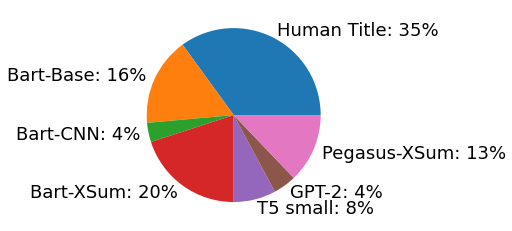

In [7]:
from builtins import sum
s = sum(scores.values())
p = list(map(lambda v: v/s*100.0, scores.values()))
expl = [0.05 if v > 15 else 0.0 for v in p]
labels = ["Human Title", "Bart-Base", "Bart-CNN", "Bart-XSum", "T5 small", "GPT-2", "Pegasus-XSum"]
plt.pie(scores.values(), labels=list(map(lambda v: f"{v[0]}: {v[1]:.0f}%", zip(labels, p))), textprops={'fontsize': 18})
